In [1]:
import os
import pandas as pd
import numpy as np
import json
import cv2
import matplotlib.pyplot as plt
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone

In [13]:
image_root = '/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtable'
label_root = '/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_circle_labeled'

In [ ]:
img_task_root = '/Users/khawaritzmi/Downloads/data/Image/'
label_tast_root = '/Users/khawaritzmi/Downloads/data/Label/'

In [33]:
def get_paths_and_labels(dataset_path):
    """Returns paths and labels of images in the `dataset_path`

    If the argument `extension` isn't passed in, the default '.jpg' is used.

    Parameters
    ----------
    dataset_path : str
        The path to the dataset
    extension : str, optional
        The extension of the file, this can be with or without the dot `.` (default is '.jpg')
    """
    paths = []
    labels = []
    for root, dirs, files in os.walk(dataset_path):
        if not dirs:
            path = '/'.join(root.split(os.sep))
            for file in files:
                if file.endswith(".jpg") == True or file.endswith(".JPG") == True or file.endswidth("jpeg") == True:
                    # if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True or image_directory.endswith(".jpeg") == True or image_directory.endswith(".png") == True:
                    if os.path.getsize(path+'/'+file) > 0:
                        labels += path.split('/')[-1:]
                        paths += [path+'/'+file]
                    else:
                        print(f'{path+"/"+file} is corrupt or empty')
    return paths, labels

In [41]:
for root, dirs, files in os.walk(image_root):
    for file in files:
        path = '/'.join(root.split(os.sep))
        print(path+file)

/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtableIMG_5811.JPG
/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtableIMG_4299.JPG
/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtableIMG_1487.JPG
/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtablegallery_#42318742_penta_lower_m.jpg
/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtablegallery_#160158513_penta_upper_m.jpg
/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtableIMG_6465.JPG
/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtableIMG_4266.JPG
/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtableIMG_5150.JPG
/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtableIMG_6459.JPG
/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtablecrop_open.jpg
/Users/khawaritzmi/GAIA_partime/Dental/programs/data

In [11]:
path, label = get_paths_and_labels(label_root, '.json')
df = pd.DataFrame([path, label]).T
df[0]

,0,1
0,/Users/khawaritzmi/GAIA_partime/Dental/program...,up
1,/Users/khawaritzmi/GAIA_partime/Dental/program...,up
2,/Users/khawaritzmi/GAIA_partime/Dental/program...,up
3,/Users/khawaritzmi/GAIA_partime/Dental/program...,up
4,/Users/khawaritzmi/GAIA_partime/Dental/program...,up
5,/Users/khawaritzmi/GAIA_partime/Dental/program...,up
6,/Users/khawaritzmi/GAIA_partime/Dental/program...,up
7,/Users/khawaritzmi/GAIA_partime/Dental/program...,up
8,/Users/khawaritzmi/GAIA_partime/Dental/program...,up
9,/Users/khawaritzmi/GAIA_partime/Dental/program...,up


In [37]:
# Load the JSON file
def load_json(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

In [38]:
data = load_json(df[0][0])

In [59]:
# Function to draw polygons and circles
def draw_annotations(image, annotations):
    for shape in annotations['shapes']:
        if shape['shape_type'] == 'polygon':
            points = np.array(shape['points'], dtype=np.int32)
            cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
        elif shape['shape_type'] == 'circle':
            center = tuple(map(int, shape['points'][0]))
            radius_point = tuple(map(int, shape['points'][1]))
            radius = int(np.sqrt((center[0] - radius_point[0])**2 + (center[1] - radius_point[1])**2))
            cv2.circle(image, center, radius, color=(255, 0, 0), thickness=2)
            cv2.circle(image, center, 5, (0, 0, 255), -1)
    return image

In [62]:
def crop_polygon(image, points):
    # Create a mask for the polygon
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [np.array(points, dtype=np.int32)], 255)

    # Extract the bounding box of the polygon
    x, y, w, h = cv2.boundingRect(np.array(points, dtype=np.int32))

    # Crop the image using the mask
    cropped_image = cv2.bitwise_and(image, image, mask=mask)[y:y+h, x:x+w]
    
    return cropped_image

In [60]:
splitted_path = data['imagePath'].split('/')
new_path = f'../OHI dataset/{splitted_path[-2]}/{splitted_path[-1]}'
new_path

'../OHI dataset/OHI_airtable/_MG_3837.JPG'

In [67]:
def main(json_file):
    data = load_json(json_file)
    print("JSON data:", data)  # Print JSON content to see the image path
    image_path = '/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtable/_MG_3852.JPG'
    # If the image path is relative, make it absolute based on the JSON file location
    image_path = os.path.join(os.path.dirname(json_file), image_path)

    image = cv2.imread(image_path)

    if image is None:
        print(f"Error loading image: {image_path}")
        return
    
    annotated_image = draw_annotations(image, data)

    # Convert BGR to RGB for matplotlib
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    # plt.figure(figsize=(10, 10))
    # plt.imshow(annotated_image)
    # plt.axis('off')
    # plt.show()

    # Process each shape in the JSON file
    for shape in data['shapes']:
        if shape['shape_type'] == 'polygon':
            points = shape['points']
            cropped_image = crop_polygon(image, points)
            # Display cropped image
            cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(10, 10))
            plt.imshow(cropped_image_rgb)
            plt.axis('off')
            plt.show()

JSON data: {'version': '5.5.0', 'flags': {}, 'shapes': [{'label': 'Front', 'points': [[414.62500000000006, 400.375], [585.875, 432.875], [789.625, 459.125], [907.125, 452.875], [1062.125, 439.125], [1145.875, 439.125], [1203.375, 485.375], [1242.125, 536.625], [1264.625, 592.875], [1252.125, 655.375], [1212.125, 721.625], [1130.875, 802.875], [1070.875, 852.875], [959.625, 880.375], [840.875, 884.125], [739.625, 875.375], [654.625, 865.375], [549.625, 870.375], [478.37500000000006, 850.375], [419.62500000000006, 794.125], [395.87500000000006, 737.875], [358.37500000000006, 589.125], [347.12500000000006, 514.125], [370.87500000000006, 426.625]], 'group_id': None, 'description': '', 'shape_type': 'polygon', 'flags': {}, 'mask': None}, {'label': 'central incisor', 'points': [[858.375, 594.125], [937.125, 605.375]], 'group_id': None, 'description': '', 'shape_type': 'circle', 'flags': {}, 'mask': None}, {'label': 'central incisor', 'points': [[707.125, 581.625], [793.375, 587.875]], 'group

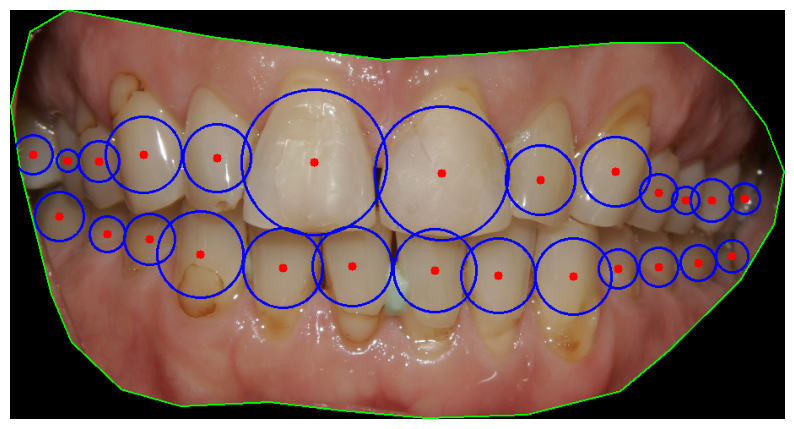

In [68]:
# # Main function to display annotations
# def main(json_file):
#     data = load_json(json_file)
#     image_path = '/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtable/_MG_3852.JPG'
#     image = cv2.imread(image_path)

#     if image is None:
#         print(f"Error loading image: {image_path}")
#         return

#     annotated_image = draw_annotations(image, data)

#     # Convert BGR to RGB for matplotlib
#     annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

#     plt.figure(figsize=(10, 10))
#     plt.imshow(annotated_image)
#     plt.axis('off')
#     plt.show()

if __name__ == "__main__":
    json_file = f'{label_root}/front/_MG_3852.json'  # Replace with your JSON file path
    main(json_file)


## Keypoint estimation using FPN 

In [53]:
label_smpl = []
for root, dirs, files in os.walk('./data/sample_training'):
    for file in files:
        if file != '.DS_Store':
            file = file.split('.')[-2]
            label_smpl.append(f'{file}.jpg')
        # if file != '.DS_Store':
        #     print(file)
        #     label_smpl.append(file)

In [54]:
label_smpl

['_MG_3837.jpg',
 'gallery_#40032188_penta_front_m.jpg',
 '_MG_3856.jpg',
 '_MG_4556.jpg',
 'gallery_#100616823_penta_upper_m.jpg',
 'gallery_#48450823_penta_upper_m.jpg',
 'gallery_#50885731_penta_front_m.jpg',
 'gallery_#42318742_penta_lower_m.jpg',
 'gallery_#106765536_penta_upper_m.jpg',
 'gallery_#76089144_penta_front_m.jpg',
 'gallery_#40615633_penta_lower_m.jpg',
 'gallery_#58038273_penta_front_m.jpg',
 'gallery_#48450823_penta_lower_m.jpg',
 'gallery_#106765536_penta_lower_m.jpg',
 'gallery_#42318742_penta_upper_m.jpg',
 '_MG_4767.jpg',
 'gallery_#40615633_penta_upper_m.jpg',
 '_MG_3889.jpg',
 '_MG_4766.jpg',
 '_MG_3892.jpg',
 'gallery_#100616823_penta_lower_m.jpg',
 'crop_open.jpg',
 'gallery_#40032188_penta_upper_m.jpg',
 '_MG_4552.jpg',
 '_MG_3852.jpg',
 'gallery_#100616823_penta_front_m.jpg',
 '_MG_4765.jpg',
 'gallery_#48450823_penta_front_m.jpg',
 'gallery_#50885731_penta_upper_m.jpg',
 'crop_smile3.jpg',
 'gallery_#106765536_penta_front_m.jpg',
 'gallery_#76089144_penta_

In [37]:
root

'./data/sample_training/label'

In [55]:
import shutil

src_root = './data/OHI dataset/OHI_airtable'
dst_root = './data/sample_training/image'

for smpl in label_smpl:
    dst = f'{dst_root}/{smpl}'
    src = f'{src_root}/{smpl}'
    shutil.copyfile(src, dst)

In [29]:
import os
import json
import cv2
import torch
from torch.utils.data import Dataset

In [75]:
class DentalDataset(Dataset):
    def __init__(self, image_dir, annotation_dir, transform=None, target_size=(256, 256), max_targets=20):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.transform = transform
        self.target_size = target_size
        self.max_targets = max_targets  # Max number of targets to pad to
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        image_path = os.path.join(self.image_dir, image_file)
        annotation_path = os.path.join(self.annotation_dir, image_file.replace('.jpg', '.json'))
        
        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Resize image
        original_size = image.shape[:2]  # Save original size for annotation resizing
        image = cv2.resize(image, self.target_size)
        
        # Load annotations
        with open(annotation_path) as f:
            annotations = json.load(f)
        circles = annotations['shapes']
        circle_centers = [(circle['points'][0][0], circle['points'][0][1]) for circle in circles]
        
        # Resize annotations according to the new image size
        h_ratio = self.target_size[0] / original_size[0]
        w_ratio = self.target_size[1] / original_size[1]
        resized_centers = [(int(center[0] * w_ratio), int(center[1] * h_ratio)) for center in circle_centers]
        
        # Pad targets to max_targets
        padded_targets = np.zeros((self.max_targets, 2), dtype=np.float32)
        padded_targets[:len(resized_centers), :] = resized_centers[:self.max_targets]
        
        # Convert to tensor
        image = torch.from_numpy(image).permute(2, 0, 1).float() / 255.0
        targets = torch.tensor(padded_targets, dtype=torch.float32)
        
        if self.transform:
            image = self.transform(image)
        
        return image, targets

In [73]:
import torch.nn as nn
import torchvision.models as models

class FPNModel(nn.Module):
    def __init__(self, backbone):
        super(FPNModel, self).__init__()
        self.backbone = backbone
        self.fpn = nn.Sequential(
            nn.Conv2d(2048, 256, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 2, kernel_size=1)  # Assuming 2 keypoints for simplicity
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.fpn(x)
        return x

# Load a pre-trained ResNet50 and use it as a backbone
backbone = models.resnet50(pretrained=True)
backbone = nn.Sequential(*list(backbone.children())[:-2])  # Remove the last layers
model = FPNModel(backbone)


/Users/khawaritzmi/miniforge3/envs/tooth_numbering-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/khawaritzmi/miniforge3/envs/tooth_numbering-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [76]:
from torch.utils.data import DataLoader

# Load dataset
image_dir = './data/sample_training/image' #programs/data/sample_training/image
annotation_dir = './data/sample_training/label' #programs/data/sample_training/label
dataset = DentalDataset(image_dir, annotation_dir, target_size=(150, 150), max_targets=28)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [77]:
dataset

In [78]:
import torch.optim as optim

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}")


/Users/khawaritzmi/miniforge3/envs/tooth_numbering-env/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4, 28, 2])) that is different to the input size (torch.Size([4, 2, 5, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (5) must match the size of tensor b (2) at non-singleton dimension 3

In [21]:
class CircleDataset(Dataset):
    def __init__(self, json_dir, transform=None):
        self.json_files = glob.glob(os.path.join(json_dir, '*.json'))
        self.transform = transform

    def __len__(self):
        return len(self.json_files)

    def __getitem__(self, idx):
        json_file = self.json_files[idx]
        with open(json_file, 'r') as f:
            data = json.load(f)

        _img_path = data['imagePath'].split('/')
        img_path = f'{image_root}/{_img_path[-1]}'

        image_path = os.path.join(os.path.dirname(json_file), img_path)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        shapes = data['shapes']
        for shape in shapes:
            if shape['shape_type'] == 'circle':
                center = np.array(shape['points'][0], dtype=np.float32)
                if self.transform:
                    image = self.transform(image)
                return image, center

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

dataset = CircleDataset('/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_circle_labeled/up', transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [7]:
dataloader

In [8]:
class CenterEstimationFPN(nn.Module):
    def __init__(self, backbone='resnet50', num_classes=2):
        super(CenterEstimationFPN, self).__init__()
        if backbone == 'resnet50':
            self.backbone = models.resnet50(pretrained=True)
            in_features = self.backbone.fc.in_features
            self.backbone = nn.Sequential(*list(self.backbone.children())[:-2])
            self.fpn = models.detection.fpn.FPN(in_channels_list=[256, 512, 1024, 2048],
                                               out_channels=256,
                                               extra_blocks=models.detection.fpn.LastLevelMaxPool())
            self.regressor = nn.Linear(in_features, num_classes)

    def forward(self, x):
        x = self.backbone(x)
        x = self.fpn(x)
        x = torch.flatten(x, 1)
        x = self.regressor(x)
        return x

model = CenterEstimationFPN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, dataloader, criterion, optimizer, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, centers in dataloader:
            images = images.to(device)
            centers = centers.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, centers)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch}/{num_epochs - 1}, Loss: {epoch_loss:.4f}')

    print('Training complete')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
train(model, dataloader, criterion, optimizer)


/Users/khawaritzmi/miniforge3/envs/tooth_numbering-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/khawaritzmi/miniforge3/envs/tooth_numbering-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/khawaritzmi/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100.0%


AttributeError: module 'torchvision.models.detection' has no attribute 'fpn'

In [14]:
class CenterEstimationFPN(nn.Module):
    def __init__(self, num_classes=2):
        super(CenterEstimationFPN, self).__init__()
        self.backbone = resnet_fpn_backbone('resnet50', pretrained=True)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(self.backbone.out_channels, num_classes)

    def forward(self, x):
        features = self.backbone(x)
        pooled_features = self.avgpool(features)
        flattened_features = torch.flatten(pooled_features, 1)
        out = self.fc(flattened_features)
        return out

model = CenterEstimationFPN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, dataloader, criterion, optimizer, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, centers in dataloader:
            images = images.to(device)
            centers = centers.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, centers)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch}/{num_epochs - 1}, Loss: {epoch_loss:.4f}')

    print('Training complete')

device = torch.device('cuda' if torch.cuda.is_available() else 'mps')
model = model.to(device)
train(model, dataloader, criterion, optimizer)

AttributeError: 'collections.OrderedDict' object has no attribute 'size'

In [26]:
class CenterEstimationFPN(nn.Module):
    def __init__(self, num_classes=2):
        super(CenterEstimationFPN, self).__init__()
        backbone = resnet50(pretrained=True)
        self.backbone = nn.Sequential(
            *list(backbone.children())[:-2]
        )
        
        # Create the FPN
        self.fpn = FeaturePyramidNetwork(
            in_channels_list=[256, 512, 1024, 2048],
            out_channels=256
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        # Forward pass through the backbone
        c2 = self.backbone[4](x)
        c3 = self.backbone[5](c2)
        c4 = self.backbone[6](c3)
        c5 = self.backbone[7](c4)
        
        # Pass through the FPN
        fpn_out = self.fpn([c2, c3, c4, c5])
        
        # Assuming we use the highest resolution feature map for simplicity
        selected_feature_map = fpn_out['0']
        
        x = self.avgpool(selected_feature_map)
        x = torch.flatten(x, 1)
        out = self.fc(x)
        return out

model = CenterEstimationFPN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, dataloader, criterion, optimizer, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, centers in dataloader:
            images = images.to(device)
            centers = centers.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, centers)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch}/{num_epochs - 1}, Loss: {epoch_loss:.4f}')

    print('Training complete')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
train(model, dataloader, criterion, optimizer)

RuntimeError: Given groups=1, weight of size [64, 64, 1, 1], expected input[4, 3, 256, 256] to have 64 channels, but got 3 channels instead

In [27]:
class CenterEstimationFPN(nn.Module):
    def __init__(self, num_classes=2):
        super(CenterEstimationFPN, self).__init__()
        backbone = resnet50(pretrained=True)
        # Extract layers from the backbone
        self.layer1 = nn.Sequential(*list(backbone.children())[:5])  # To get output at 256 channels
        self.layer2 = nn.Sequential(*list(backbone.children())[5])  # To get output at 512 channels
        self.layer3 = nn.Sequential(*list(backbone.children())[6])  # To get output at 1024 channels
        self.layer4 = nn.Sequential(*list(backbone.children())[7])  # To get output at 2048 channels

        # Feature Pyramid Network
        self.fpn = FeaturePyramidNetwork(
            in_channels_list=[256, 512, 1024, 2048],
            out_channels=256
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        # Forward pass through the backbone layers
        c2 = self.layer1(x)
        c3 = self.layer2(c2)
        c4 = self.layer3(c3)
        c5 = self.layer4(c4)
        
        # Pass through the FPN
        fpn_out = self.fpn([c2, c3, c4, c5])
        
        # Assuming we use the highest resolution feature map for simplicity
        selected_feature_map = fpn_out['0']
        
        x = self.avgpool(selected_feature_map)
        x = torch.flatten(x, 1)
        out = self.fc(x)
        return out

model = CenterEstimationFPN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, dataloader, criterion, optimizer, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, centers in dataloader:
            images = images.to(device)
            centers = centers.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, centers)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch}/{num_epochs - 1}, Loss: {epoch_loss:.4f}')

    print('Training complete')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
train(model, dataloader, criterion, optimizer)

AttributeError: 'list' object has no attribute 'keys'

In [80]:
from sklearn.cluster import MeanShift

# Sample data (replace with your actual data)
data = [[1, 1], [1.2, 1.1], [0.8, 0.7], [5, 5], [4.8, 4.9]]

# Define the Mean Shift model
model = MeanShift()

# Fit the model to the data
model.fit(data)

# Get the cluster centers (centroids)
centroids = model.cluster_centers_

# Print the centroids (potential shift indicators)
print("Cluster centers:")
print(centroids)


KeyboardInterrupt: 

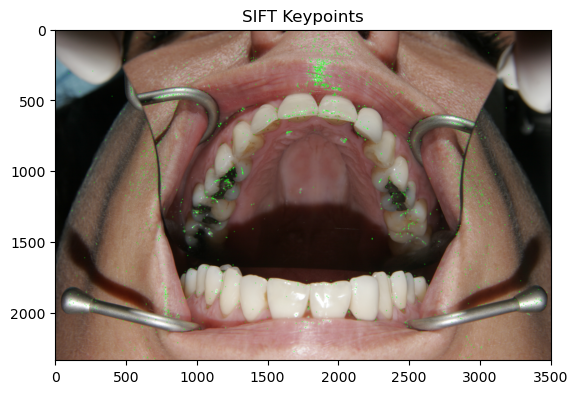

In [2]:
import cv2
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('/Users/khawaritzmi/GAIA_partime/Dental/programs/data/OHI dataset/OHI_airtable/_MG_3837.JPG')

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints on the image
img_keypoints = cv2.drawKeypoints(img.copy(), keypoints, None, color=(0,255,0))

# Show the image with keypoints
plt.imshow(img_keypoints[:,:,::-1])
plt.title('SIFT Keypoints')
plt.show()
